In [49]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [50]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [51]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [52]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [53]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [54]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [55]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [56]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [66]:
# Find the most recent date in the data set.
most_recent=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

Text(0, 0.5, 'Inches')

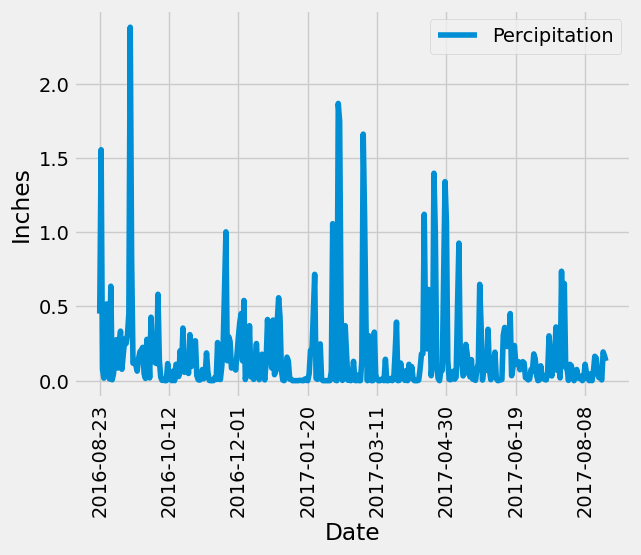

In [128]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_twelve=dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_twelve

# Perform a query to retrieve the data and precipitation scores
percipitation=session.query(Measurement.date, func.avg(Measurement.prcp)).\
filter(Measurement.date >= last_twelve).\
group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df=pd.DataFrame(percipitation, columns=['Date','Percipitation'])

# Sort the dataframe by date
# prcp_df.set_index('Date', inplace=True)
prcp_df=prcp_df.sort_values('Date')
prcp_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x='Date', y='Percipitation',rot=90)
plt.ylabel('Inches')

In [117]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats=prcp_df["Percipitation"].describe()
summary_stats_df=pd.DataFrame(summary_stats,columns=['Percipitation'])
summary_stats_df

,Percipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [58]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [59]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order. 
session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [64]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs).\
              filter(Measurement.station == 'USC00519281')).all()

[(53.0, 87.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature(F)')

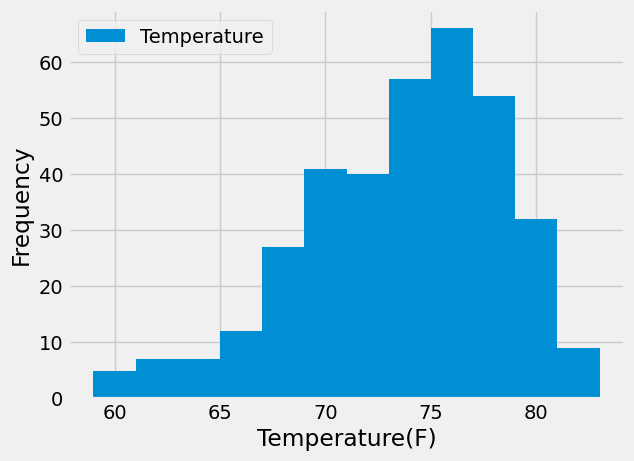

In [134]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# latest_date=session.query(Measurement.date).\
# filter(Measurement.station == 'USC00519281').\
# order_by(Measurement.date.desc()).first()

year_data=dt.date(2017, 8, 18) - dt.timedelta(days=365)
year_data

temp_data =session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= year_data).all()
temp_data

#plot results as a histogram
temp_df=pd.DataFrame(temp_data, columns=['Temperature'])

temp_df.plot.hist(bins=12)
plt.xlabel('Temperature(F)')

# Close Session

In [135]:
# Close Session
session.close()